# Введение в scikit-learn

### Метод k ближайших соседей

#### Скачивание данных

In [1]:
#! wget https://s3.amazonaws.com/img-datasets/mnist.npz

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

#### Разделение данных на обучение и тест

In [2]:
from sklearn.model_selection import train_test_split


f = np.load('mnist.npz')
print(f.files)
x_train, y_train = f['x_train'], f['y_train']

X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42)
 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

['x_test', 'x_train', 'y_train', 'y_test']
(54000, 28, 28) (6000, 28, 28) (54000,) (6000,)


#### Визуализация данных

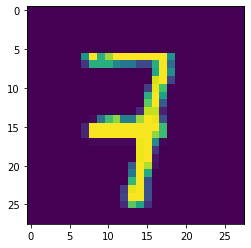

label is 7


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

index = 1034

plt.imshow(X_train[index])
plt.show()
print('label is %d' % y_train[index])

#### Препроцессинг данных

In [6]:
x_train = X_train.reshape((len(X_train), -1))
x_test = X_test.reshape((len(X_test), -1))

print(x_train.shape, x_test.shape)

(54000, 784) (6000, 784)


#### Обучение модели одного ближайшего соседа

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                     weights='uniform')

#### Тестирование модели

In [10]:
N = 1000
x_test = x_test[:N]
y_test = y_test[:N]

y_pred = knn_model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.974


In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.973


In [13]:
knn_model = KNeighborsClassifier(n_neighbors=5,  weights='distance', n_jobs=-1)

knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.976
